In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install kneed
from kneed import KneeLocator
import seaborn as sns

# Exploratory Data Analysis

In [8]:
# load dataset
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/mall_customers.csv"
df = pd.read_csv(url)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [11]:
# rename the Income($)	column
df = df.rename(columns={"Annual Income (k$)": "Income"})
df.head()

,CustomerID,Gender,Age,Income,Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


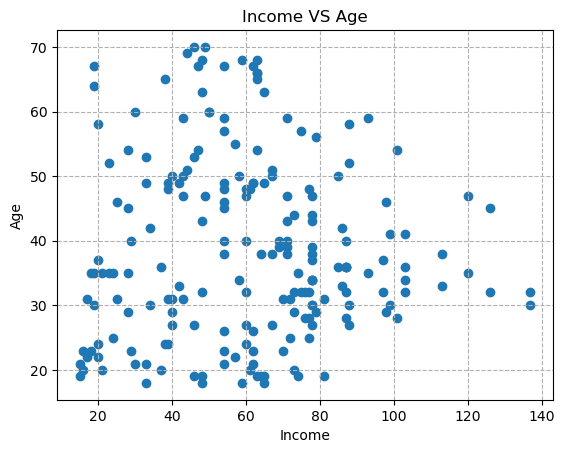

In [12]:
plt.scatter(df['Income'], df['Age'])
plt.title('Income VS Age')
plt.xlabel('Income')
plt.ylabel('Age')
plt.grid(axis='both', linestyle='--')
plt.show()

In [13]:
# create new dataframe that consist only annual income and spending score
df = df[['Age', 'Income']]
df.head()

,Age,Income
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17


Scatter plot menunjukkan tidak ada korelasi kuat antara pendapatan dan usia — data tersebar acak, menunjukkan pelanggan dengan usia muda maupun tua memiliki rentang pendapatan yang luas.

# Data Scaling (Choose One)

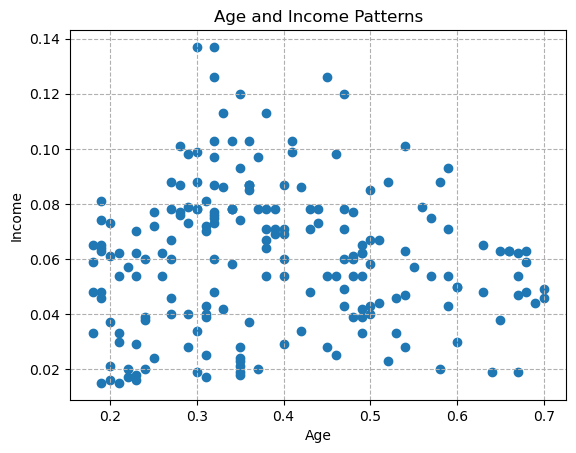

In [14]:
# scale dataset with decimal scaling
def decimal_scaling(df):
  normalized_df = df.copy()
  for column in df.columns:
    j = 0
    max_value = df[column].max()
    while max_value > 1:
      max_value /= 10
      j += 1
    normalized_df[column] = df[column] / (10 ** j)
  return normalized_df

# Example usage:
df_decimal_scaled = decimal_scaling(df)

df_decimal_scaled.head()

# visualization
plt.scatter(df_decimal_scaled["Age"], df_decimal_scaled["Income"])
plt.xlabel("Age")
plt.ylabel("Income")
plt.grid(axis='both', linestyle='--')
plt.title("Age and Income Patterns")
plt.show()

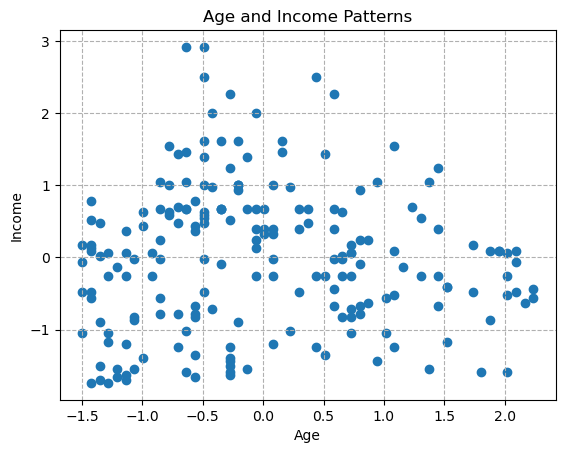

In [15]:
# scale dataset with standard scaler

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

df_sc_scaled = pd.DataFrame(sc.fit_transform(df), columns=["Age", "Income"])

df_sc_scaled.head()

# visualization
plt.scatter(df_sc_scaled["Age"], df_sc_scaled["Income"])
plt.xlabel("Age")
plt.ylabel("Income")
plt.grid(axis='both', linestyle='--')
plt.title("Age and Income Patterns")
plt.show()

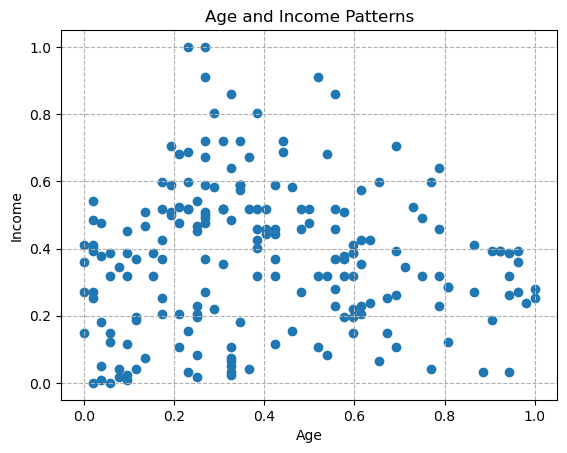

In [16]:
# scale dataset with Min Max scaler

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_minmax_scaled = pd.DataFrame(scaler.fit_transform(df), columns=["Age", "Income"])

df_minmax_scaled.head()

# visualization
plt.scatter(df_minmax_scaled["Age"], df_minmax_scaled["Income"])
plt.xlabel("Age")
plt.ylabel("Income")
plt.grid(axis='both', linestyle='--')
plt.title("Age and Income Patterns")
plt.show()



Nilai Age dan Income berhasil diubah menjadi rentang kecil (kurang dari 1).

Scatter plot menunjukkan bentuk sebaran tetap sama seperti data asli, hanya berbeda pada skala sumbu.

Langkah ini penting sebelum melakukan K-Means Clustering, karena algoritme K-Means sensitif terhadap skala variabel.

# K-Means Clustering

In [17]:
from sklearn.cluster import KMeans

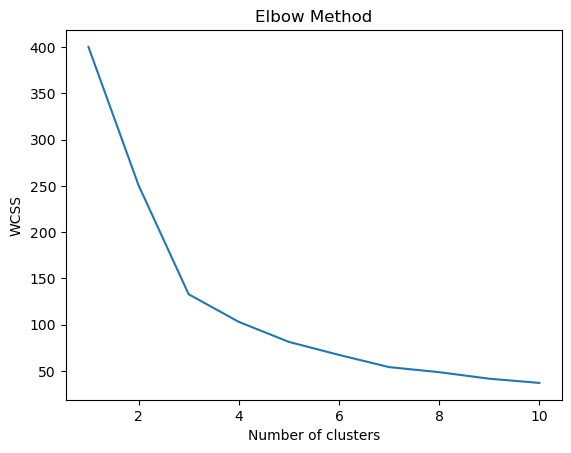

In [18]:
wcss = []
for i in range(1, 11):   #clusters 1-10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_sc_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [19]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(1, 11),
    "WCSS": wcss
})

# Display the table
print(wcss_table)

   Number of Clusters        WCSS
0                   1  400.000000
1                   2  250.588116
2                   3  132.855304
3                   4  103.051518
4                   5   81.408191
5                   6   67.358905
6                   7   54.161256
7                   8   48.692261
8                   9   41.640921
9                  10   37.080115


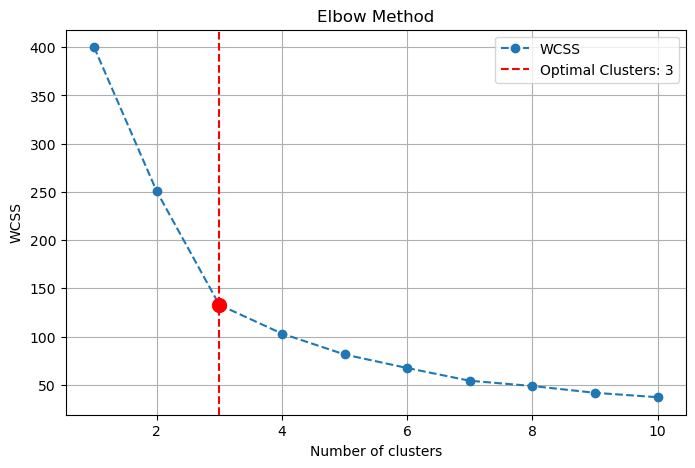

The optimal number of clusters is: 3


In [25]:
# Example WCSS values and cluster numbers
clusters = range(1, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

In [21]:
# Fit K-Means to the data with the optimal number of K cluster = 3
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
clusters = kmeans.fit_predict(df_sc_scaled)

# Add the cluster labels to the DataFrame
df['KMeans_Cluster'] = clusters

# Show the df
df.head()

,Age,Income,KMeans_Cluster
0,19,15,2
1,21,15,2
2,20,16,2
3,23,16,2
4,31,17,2


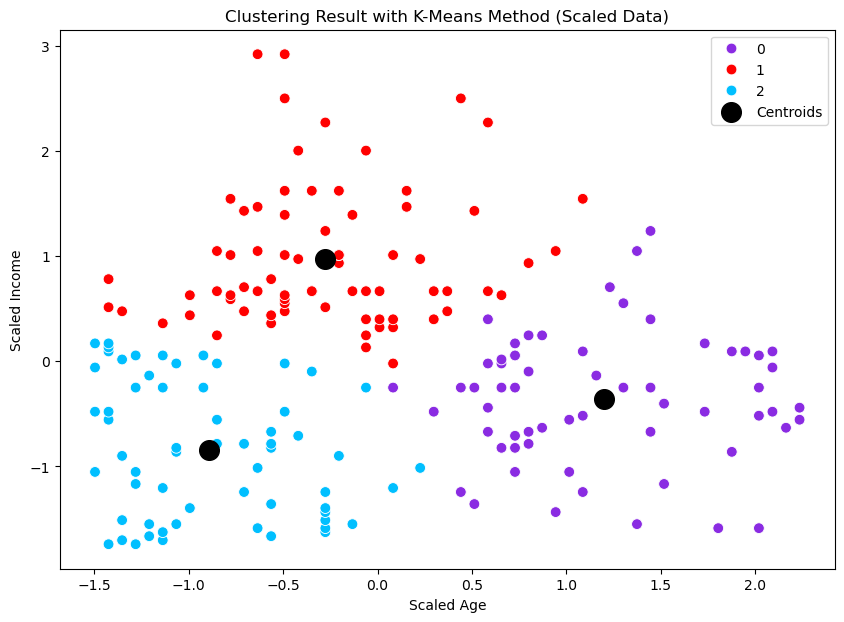

In [22]:
# visualize the result using scater chart on scaled data
plt.figure(figsize=(10,7))

sns.scatterplot(x = "Age", y = "Income", hue=clusters, palette=["blueviolet", "red", "deepskyblue"], data=df_sc_scaled, s = 60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c="black", label="Centroids")
plt.xlabel("Scaled Age")
plt.ylabel("Scaled Income")
plt.title("Clustering Result with K-Means Method (Scaled Data)")
plt.legend()
plt.show()

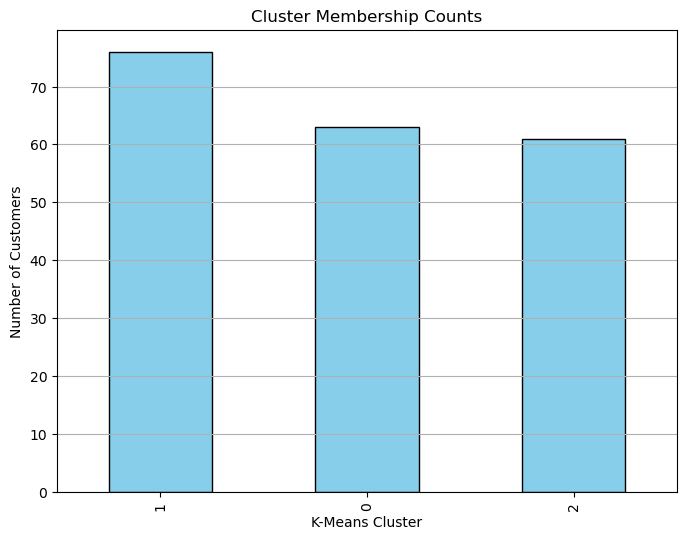

In [23]:
cluster_counts = df['KMeans_Cluster'].value_counts()

plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cluster Membership Counts')
plt.xlabel('K-Means Cluster')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()


In [24]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster
cluster_summary = df.groupby(clusters).agg({'Age': ['mean', 'min', 'max'],
                                              'Income': ['mean', 'min', 'max']})

cluster_summary = cluster_summary.rename_axis('KMeans_cluster')

cluster_summary

Age             Income         
                     mean min max       mean min  max
KMeans_cluster                                       
0               55.555556  40  70  51.269841  19   93
1               34.960526  19  54  85.934211  60  137
2               26.442623  18  42  38.540984  15   65



- Elbow method dan KneeLocator konsisten menunjukkan bahwa 3 cluster adalah jumlah optimal.

- Hasil visualisasi memperlihatkan 3 kelompok pelanggan berbeda:

 Cluster 0 (misalnya biru): pelanggan berusia muda dengan pendapatan rendah–menengah.

 Cluster 1 (merah): pelanggan usia menengah dengan pendapatan tinggi.

 Cluster 2 (cyan): pelanggan muda hingga paruh baya dengan pendapatan menengah.

- Diagram batang jumlah anggota tiap cluster menunjukkan distribusi pelanggan yang relatif seimbang antar cluster.

## Managerial Implications Based on the Three Clusters

### **Cluster 0 — Younger / Low-Income Consumers**

**Profile:**
- Usia relatif muda (sekitar 18–30 tahun).  
- Pendapatan tahunan rendah, biasanya di bawah \$40K.  
- Cenderung masih di awal karier atau mahasiswa pascasarjana.  
- Memiliki minat tinggi terhadap tren baru, tetapi sensitif terhadap harga.

**Implications:**
- Fokuskan promosi pada produk berharga terjangkau dan diskon musiman.  
- Gunakan media sosial dan kampanye digital berbasis tren (influencer, TikTok, Instagram Ads).  
- Tawarkan program loyalitas atau cashback untuk mendorong pembelian berulang.  
- Gunakan pesan pemasaran yang menonjolkan *lifestyle aspiration* dan nilai hemat.

- - -

### **Cluster 1 — Mid-Age / Middle-Income Segment**

**Profile:**
- Usia sekitar 30–40 tahun.  
- Pendapatan menengah (sekitar \$60K–\$80K).  
- Sudah stabil secara karier, mulai membangun keluarga atau investasi.  
- Cenderung mencari keseimbangan antara kualitas dan harga.

**Implications:**
- Tawarkan produk dengan *value for money* dan kualitas baik.  
- Gunakan strategi pemasaran yang menekankan kepraktisan, kenyamanan, dan manfaat jangka panjang.  
- Cocok untuk paket keluarga, membership hemat, atau program cicilan ringan.  
- Komunikasikan keunggulan fungsional, bukan hanya gaya hidup.

---

### **Cluster 2 — Mature / High-Income Professionals**

**Profile:**
- Usia di atas 40 tahun (sekitar 40–60 tahun).  
- Pendapatan tertinggi di antara semua klaster (> \$100K).  
- Stabil secara finansial, berorientasi pada kualitas, prestise, dan pelayanan eksklusif.  
- Cenderung loyal pada merek yang dipercaya dan menghargai kenyamanan.

**Implications:**
- Tawarkan produk premium dan layanan eksklusif (VIP service, konsultasi pribadi).  
- Fokus pada pengalaman pelanggan (*customer experience*) yang unggul.  
- Gunakan strategi retensi jangka panjang dengan komunikasi personal dan benefit eksklusif.  
- Cocok untuk program *cross-selling* atau *up-selling* produk bernilai tinggi.  

---

### **Overall Recommendation**
Ketiga segmen pelanggan ini menunjukkan **segmentasi pasar yang jelas berdasarkan usia dan pendapatan**.  
- Strategi harga dan promosi harus disesuaikan per kelompok.  
- Pemasaran digital dan pengalaman pelanggan yang dipersonalisasi akan meningkatkan efektivitas k
